In [2]:
f = open("months.txt")
print(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'months.txt'

In [5]:
import csv
f = open("/Users/ChrisD/Desktop/airports.dat")
for row in csv.reader(f):
    print(row[1])

Goroka
Madang
Mount Hagen
Nadzab
Port Moresby Jacksons Intl
Wewak Intl
Narsarsuaq
Nuuk
Sondre Stromfjord
Thule Air Base
Akureyri
Egilsstadir
Hornafjordur
Husavik
Isafjordur
Keflavik International Airport
Patreksfjordur
Reykjavik
Siglufjordur
Vestmannaeyjar
Sault Ste Marie
Winnipeg St Andrews
Shearwater
St Anthony
Tofino
Kugaaruk
Baie Comeau
Bagotville
Baker Lake
Campbell River
Brandon Muni
Cambridge Bay
Nanaimo
Castlegar
Miramichi
Charlo
Kugluktuk
Coronation
Chilliwack
Clyde River
Fairmont Hot Springs
Dawson City
Burwash
Princeton
Deer Lake
Dease Lake
Dauphin Barker
Dawson Creek
Edmonton Intl
Arviat
Estevan
Edson
Eureka
Inuvik Mike Zubko
Iqaluit
Fredericton
Forestville
Flin Flon
Fort Resolution
Fort Simpson
Kingston
La Grande Riviere
Gaspe
Geraldton Greenstone Regional
Iles De La Madeleine
Hudson Bay
Dryden Rgnl
Ulukhaktok Holman
Gjoa Haven
Hamilton
St Hubert
Hay River
Halifax Intl
Atikokan Muni
Pond Inlet
St Jean
Stephenville
Kamloops
Waterloo
Schefferville
Kindersley
Buttonville Muni

In [14]:
import csv
f = open("/Users/ChrisD/Desktop/routes.dat")
for row in csv.reader(f):
    route = row(0)
    
route
        


TypeError: 'list' object is not callable

In [8]:
import csv
latitudes = {}
longitudes = {}
f = open("/Users/ChrisD/Desktop/airports.dat")
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

In [7]:
latitudes

{'2537': -19.63375,
 '8069': 15.25,
 '8457': 51.304111,
 '3486': 41.411689,
 '75': 72.683334,
 '8151': 52.830601,
 '269': 10.696025,
 '5826': 11.1572,
 '3340': -37.932222,
 '5850': 18.6631,
 '5912': -16.495,
 '5930': 37.492958,
 '878': -24.602333,
 '8890': 23.123642,
 '3660': 34.729444,
 '9244': 44.683333,
 '8027': -24.802812,
 '1625': 39.455272,
 '555': 51.616389,
 '96': 49.761667,
 '3787': 19.760056,
 '8958': 42.8711,
 '6181': 27.583,
 '2750': 2.152175,
 '8875': 33.96889877,
 '4235': 0.4880555,
 '6964': 26.8575,
 '9485': 37.888573,
 '505': 51.676111,
 '2988': 55.591531,
 '6855': 55.7001,
 '297': 9.767333,
 '3224': 25.383636,
 '7115': 66.362222,
 '3346': -30.789444,
 '1308': 47.005886,
 '8128': 46.303056,
 '834': -27.770586,
 '9231': 43.745,
 '7381': -7.258889,
 '1723': 39.710203,
 '5623': -15.583,
 '4291': -28.833889,
 '7987': 55.29944,
 '582': 50.911658,
 '3228': 25.354375,
 '7421': 8.7163,
 '1960': -17.755392,
 '6714': 70.4673,
 '3667': 47.615058,
 '3931': 18.766847,
 '3101': 26.44

In [10]:
from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
    radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius

    # Lat,long are in degrees but we need radians
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)

    dlat = lat2-lat1
    dlon = long2-long1

    a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
    distance = 2 * radius * asin(sqrt(a))

    return distance

distance(-37.814,144.963,52.519,13.406)

15973.237754707652

In [62]:
import csv
latitudes = {}
longitudes = {}
f = open("/Users/ChrisD/Desktop/airports.dat")
for row in csv.reader(f):
    airport_id = row[0]
    latitudes[airport_id] = float(row[6])
    longitudes[airport_id] = float(row[7])

    
from math import cos,radians,sin,pow,asin,sqrt
def distance(lat1, long1, lat2, long2):
    radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius

    # Lat,long are in degrees but we need radians
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)

    dlat = lat2-lat1
    dlon = long2-long1

    a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
    distance = 2 * radius * asin(sqrt(a))

    return distance


distances = []
f = open("/Users/ChrisD/Desktop/routes.dat")
for row in csv.reader(f):
    source_airport = row[3]
    dest_airport = row[5]
    if source_airport in latitudes and dest_airport in latitudes:
        source_lat = latitudes[source_airport]
        source_long = longitudes[source_airport]
        dest_lat = latitudes[dest_airport]
        dest_long = longitudes[dest_airport]
        distances.append(distance(source_lat,source_long,dest_lat,dest_long))
        


In [69]:
import pandas as pd
pd.read_hdf?

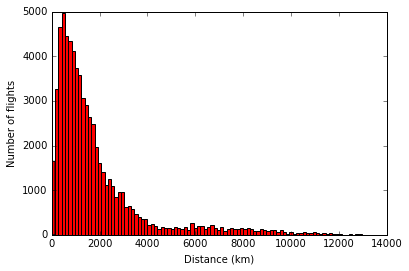

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.hist(distances, 100, facecolor='r')
plt.xlabel("Distance (km)")
plt.ylabel("Number of flights")
plt.show()

In [49]:
# Airline	2-letter (IATA) or 3-letter (ICAO) code of the airline.
# Airline ID	Unique OpenFlights identifier for airline (see Airline).
# Source airport	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
# Source airport ID	Unique OpenFlights identifier for source airport (see Airport)
# Destination airport	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
# Destination airport ID	Unique OpenFlights identifier for destination airport (see Airport)
# Codeshare	"Y" if this flight is a codeshare (that is, not operated by Airline, but another carrier), empty otherwise.
# Stops	Number of stops on this flight ("0" for direct)
# Equipment	3-letter codes for plane type(s) generally used on this flight, separated by spaces

import csv 

headers = ['airline', 'airline_id', 'source_airport', 'source_airport_id',
          'dest_airport', 'dest_airport_id', 'codeshare', 'stops', 'equip']

in_airports = dict()
out_airports = dict()

with open('/Users/ChrisD/Desktop/routes.dat', 'rt') as route_file:
    reader = csv.DictReader(route_file, fieldnames=headers)
    for row in reader:
        airport_code = row['dest_airport']
        in_airports[airport_code] = in_airports.get(airport_code, 0) + 1
        airport_code = row['source_airport']
        out_airports[airport_code] = out_airports.get(airport_code, 0) + 1    
    

airport_in_counts = sorted([(route_count, airport_code) for airport_code, route_count in in_airports.items()], reverse=True)
airport_out_counts = sorted([(route_count, airport_code) for airport_code, route_count in out_airports.items()], reverse=True)   

print("maximum source routes: {}".format(str(airport_in_counts[0])))
print("maximum destination routes: {}".format(str(airport_out_counts[0])))

maximum source routes: (911, 'ATL')
maximum destination routes: (915, 'ATL')


In [46]:
airport_counts = sorted([(route_count, airport_code) for airport_code, route_count in airports.items()], reverse=True)

In [48]:
airport_counts[0]

(911, 'ATL')

In [52]:
import csv 
import collections

def airport_sorter(airport_dict, message):
    ''' takes a dict of airport_codes:counts, finds maximum counts, prints result '''
    airport_counts = [(route_count, airport_code) for airport_code, route_count in airport_dict.items()]
    airport_counts = sorted(airport_counts, reverse=True)
    print(message.format(str(airport_counts[0])))
    return airport_counts[0]
    

headers = ['airline', 'airline_id', 'source_airport', 'source_airport_id',
          'dest_airport', 'dest_airport_id', 'codeshare', 'stops', 'equip']

in_airports = collections.defaultdict(int)
out_airports = collections.defaultdict(int)

with open('/Users/ChrisD/Desktop/routes.dat', 'rt') as route_file:
    reader = csv.DictReader(route_file, fieldnames=headers)
    for row in reader:
        in_airports[row['dest_airport']]    += 1
        out_airports[row['source_airport']] += 1    
    
airport_sorter(in_airports, "maximum source routes: {}")
airport_sorter(out_airports, "maximum destination routes: {}")



maximum source routes: (911, 'ATL')
maximum destination routes: (915, 'ATL')


(915, 'ATL')